### Homework 5 

In [19]:
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = (15,10)

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  𝜎 , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. 

Text(0.5, 0, 'Observed data, $P(d|s)$')

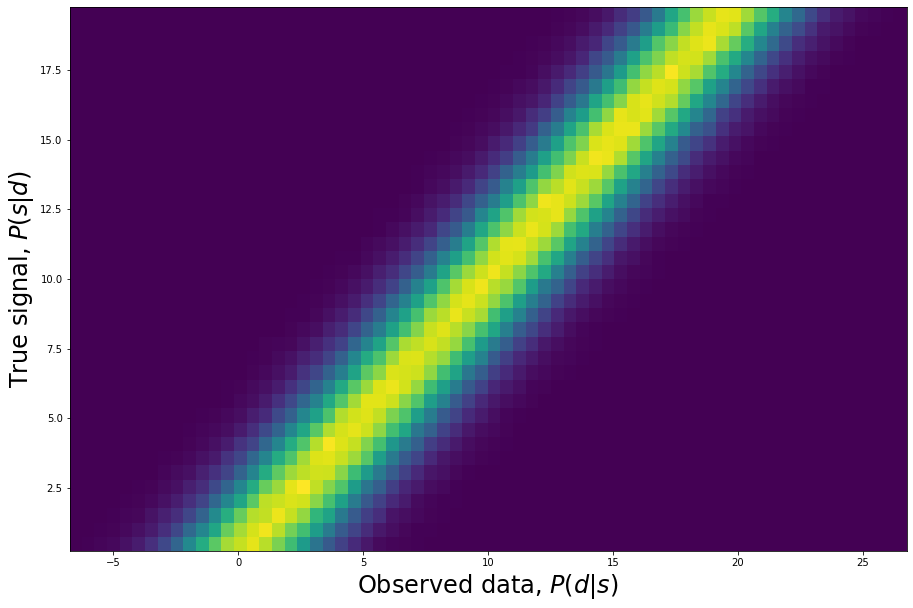

In [20]:
bkgd = stats.norm.rvs(scale = 2, size = 1000000)
signal = stats.uniform.rvs(scale = 20, size=1000000)


data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Problem 1b
Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

Text(0, 0.5, 'Probability')

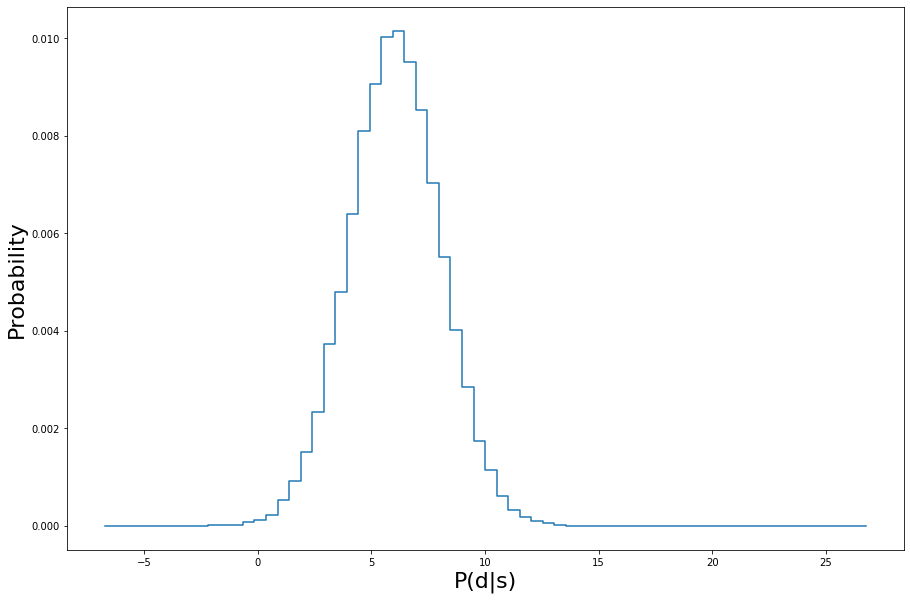

In [50]:
plt.step(datacenters, Psd[:,2])
plt.xlabel('P(d|s)', fontsize=22)
plt.ylabel('Probability', fontsize=22)

Observing the plot above we can see that the true signal value versus the value we injected is centered around 7

Problem 1c
Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

Text(0, 0.5, 'Probability')

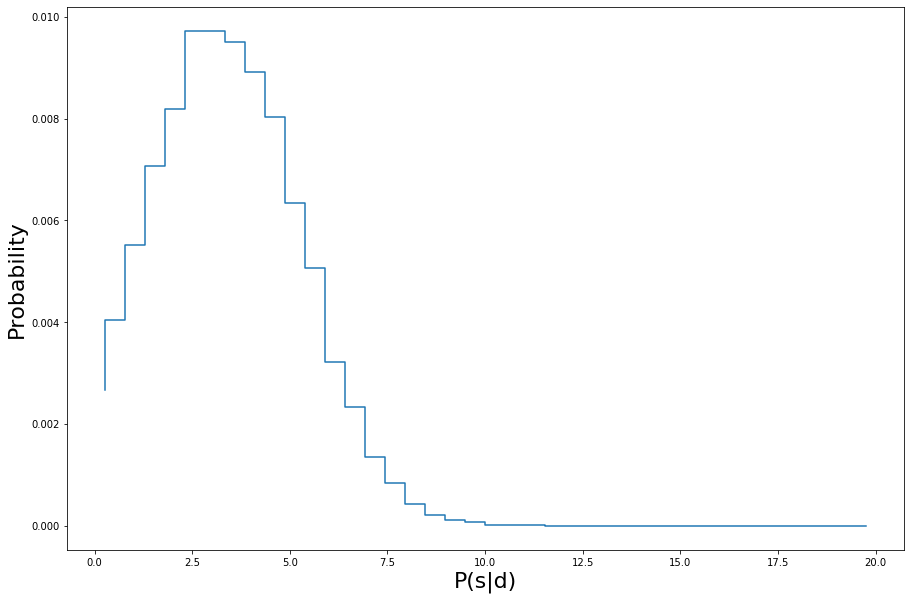

In [53]:
plt.step(signalcenters, Psd[30,:])
plt.xlabel('P(s|d)', fontsize=22)
plt.ylabel('Probability', fontsize=22)

From plot above, we can see that the mean is centered around 2.6 for the true value signal.

Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  𝜎 ]. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

67


Text(0.5, 0, 'Observed data, $P(d|s)$')

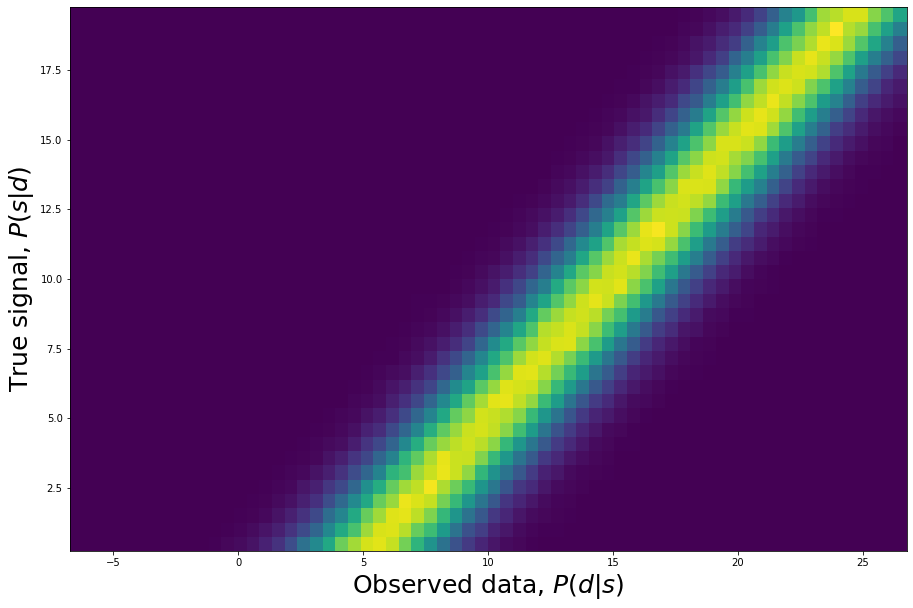

In [35]:
bkgd = stats.norm.rvs(loc=5, scale=2, size = 1000000)
signal = stats.uniform.rvs(scale = 20, size=1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

x=len(Psd)
print(x)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 25)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 25)

Text(0, 0.5, 'Probability')

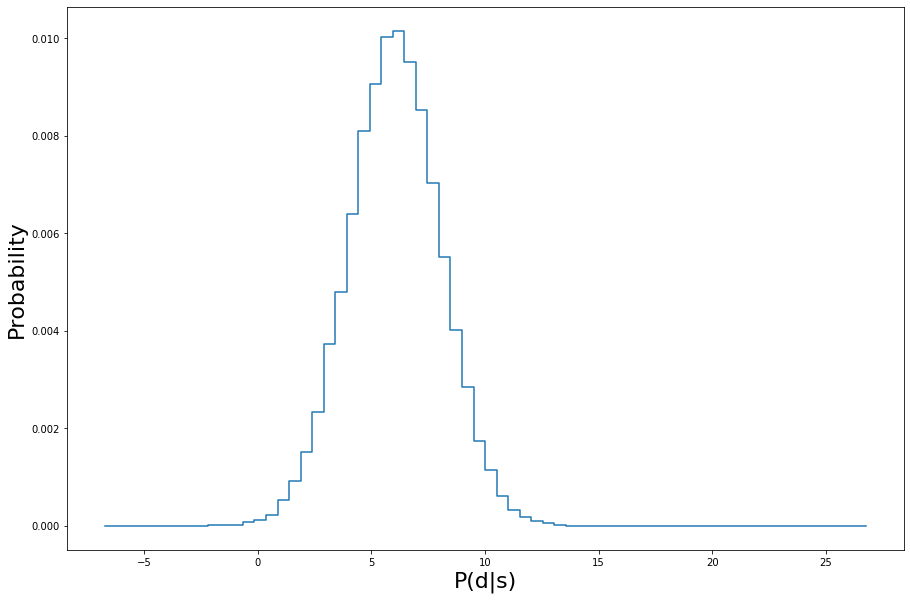

In [47]:
plt.step(datacenters, Psd[:,2])
plt.xlabel('P(d|s)', fontsize=22)
plt.ylabel('Probability', fontsize=22)

Text(0, 0.5, 'Probability')

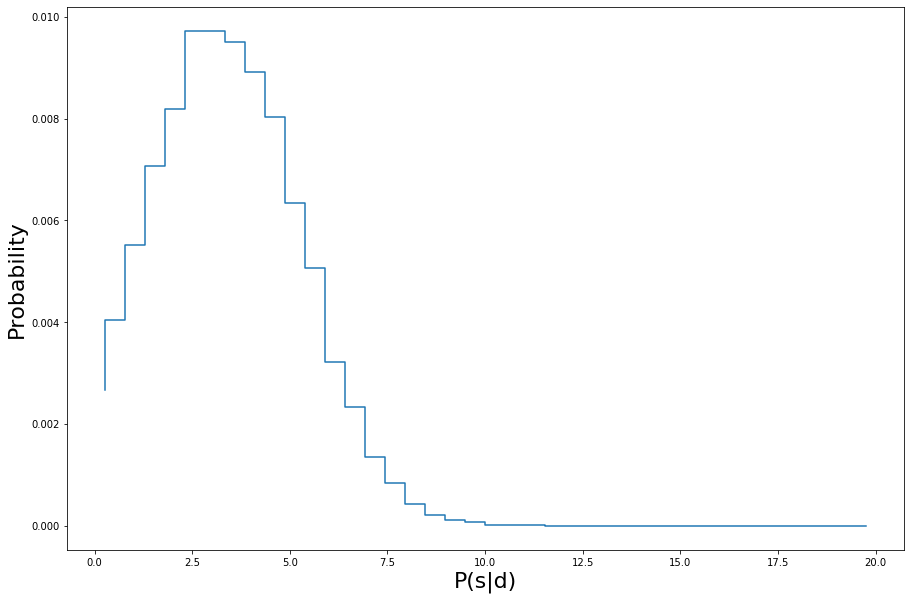

In [54]:
plt.step(signalcenters, Psd[30,:])
plt.xlabel('P(s|d)', fontsize=22)
plt.ylabel('Probability', fontsize=22)

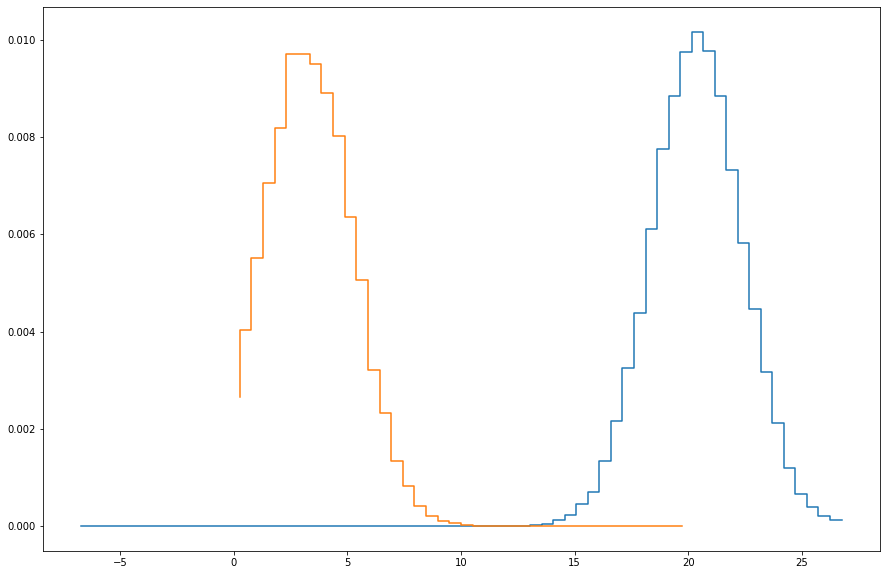

In [55]:
plt.step(datacenters, Psd[:,30])
plt.step(signalcenters,Psd[30,:])
plt.show()

Observing the plot above we can see that the distributions have differing mean values. 𝑃(𝑑|𝑠) is the probability distribution of injected random values that eqaute to the true given signal. While 𝑃(𝑠|𝑑) is the probability distribution of the true signal given we have in the data. 